In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

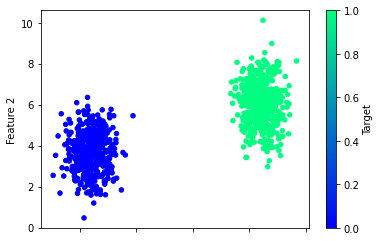

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
 #Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 551us/step - loss: 0.7342 - accuracy: 0.4573
Epoch 2/100
24/24 [==============================] - 0s 520us/step - loss: 0.7264 - accuracy: 0.3400
Epoch 3/100
24/24 [==============================] - 0s 477us/step - loss: 0.7200 - accuracy: 0.3587
Epoch 4/100
24/24 [==============================] - 0s 477us/step - loss: 0.7148 - accuracy: 0.3787
Epoch 5/100
24/24 [==============================] - 0s 564us/step - loss: 0.7104 - accuracy: 0.3867
Epoch 6/100
24/24 [==============================] - 0s 564us/step - loss: 0.7068 - accuracy: 0.3973
Epoch 7/100
24/24 [==============================] - 0s 520us/step - loss: 0.7037 - accuracy: 0.4093
Epoch 8/100
24/24 [==============================] - 0s 520us/step - loss: 0.7011 - accuracy: 0.4253
Epoch 9/100
24/24 [==============================] - 0s 477us/step - loss: 0.6990 - accuracy: 0.4453
Epoch 10/100
24/24 [==============================] - 0s 520us/step - loss: 0.6970 - accura

<AxesSubplot:>

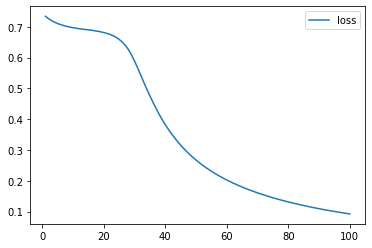

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

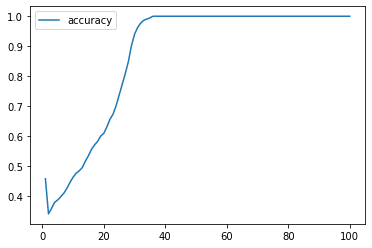

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0869 - accuracy: 1.0000
Loss: 0.08686619251966476, Accuracy: 1.0


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

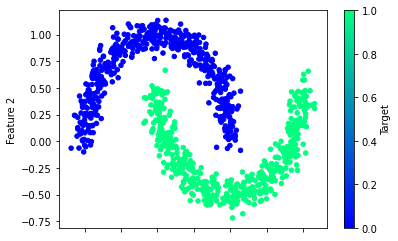

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 737us/step - loss: 0.7261 - accuracy: 0.6427
Epoch 2/100
24/24 [==============================] - 0s 780us/step - loss: 0.6571 - accuracy: 0.6627
Epoch 3/100
24/24 [==============================] - 0s 780us/step - loss: 0.6051 - accuracy: 0.6800
Epoch 4/100
24/24 [==============================] - 0s 694us/step - loss: 0.5681 - accuracy: 0.6893
Epoch 5/100
24/24 [==============================] - 0s 781us/step - loss: 0.5409 - accuracy: 0.7027
Epoch 6/100
24/24 [==============================] - 0s 776us/step - loss: 0.5191 - accuracy: 0.7120
Epoch 7/100
24/24 [==============================] - 0s 780us/step - loss: 0.5011 - accuracy: 0.7187
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7253
Epoch 9/100
24/24 [==============================] - 0s 997us/step - loss: 0.4737 - accuracy: 0.7333
Epoch 10/100
24/24 [==============================] - 0s 867us/step - loss: 0.4624 - accuracy

24/24 [==============================] - 0s 730us/step - loss: 0.2673 - accuracy: 0.8933
Epoch 82/100
24/24 [==============================] - 0s 694us/step - loss: 0.2669 - accuracy: 0.8933
Epoch 83/100
24/24 [==============================] - 0s 780us/step - loss: 0.2665 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 737us/step - loss: 0.2661 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 780us/step - loss: 0.2657 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 694us/step - loss: 0.2653 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 867us/step - loss: 0.2649 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 737us/step - loss: 0.2646 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 737us/step - loss: 0.2642 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 737us/step - loss: 0.2639 - accuracy: 

<AxesSubplot:>

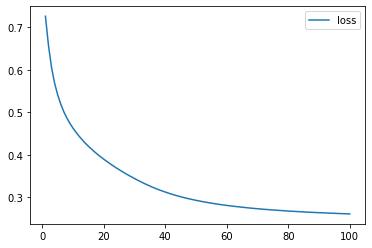

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

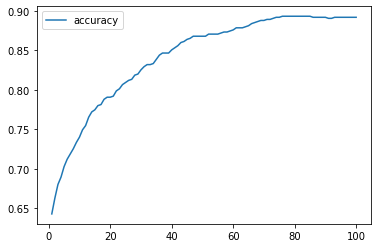

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 520us/step - loss: 0.6711 - accuracy: 0.5013
Epoch 2/100
24/24 [==============================] - 0s 477us/step - loss: 0.6346 - accuracy: 0.4867
Epoch 3/100
24/24 [==============================] - 0s 520us/step - loss: 0.6018 - accuracy: 0.4840
Epoch 4/100
24/24 [==============================] - 0s 520us/step - loss: 0.5726 - accuracy: 0.5040
Epoch 5/100
24/24 [==============================] - 0s 520us/step - loss: 0.5457 - accuracy: 0.5413
Epoch 6/100
24/24 [==============================] - 0s 520us/step - loss: 0.5219 - accuracy: 0.5733
Epoch 7/100
24/24 [==============================] - 0s 520us/step - loss: 0.4993 - accuracy: 0.6187
Epoch 8/100
24/24 [==============================] - 0s 520us/step - loss: 0.4784 - accuracy: 0.6693
Epoch 9/100
24/24 [==============================] - 0s 561us/step - loss: 0.4587 - accuracy: 0.7320
Epoch 10/100
24/24 [==============================] - 0s 520us/step - loss: 0.4405 - accura

24/24 [==============================] - 0s 518us/step - loss: 0.2318 - accuracy: 0.9013
Epoch 82/100
24/24 [==============================] - 0s 519us/step - loss: 0.2312 - accuracy: 0.9000
Epoch 83/100
24/24 [==============================] - 0s 520us/step - loss: 0.2310 - accuracy: 0.9013
Epoch 84/100
24/24 [==============================] - 0s 434us/step - loss: 0.2302 - accuracy: 0.9013
Epoch 85/100
24/24 [==============================] - 0s 520us/step - loss: 0.2298 - accuracy: 0.9013
Epoch 86/100
24/24 [==============================] - 0s 520us/step - loss: 0.2294 - accuracy: 0.9013
Epoch 87/100
24/24 [==============================] - 0s 520us/step - loss: 0.2289 - accuracy: 0.9013
Epoch 88/100
24/24 [==============================] - 0s 476us/step - loss: 0.2284 - accuracy: 0.9027
Epoch 89/100
24/24 [==============================] - 0s 477us/step - loss: 0.2280 - accuracy: 0.9027
Epoch 90/100
24/24 [==============================] - 0s 516us/step - loss: 0.2275 - accuracy: 